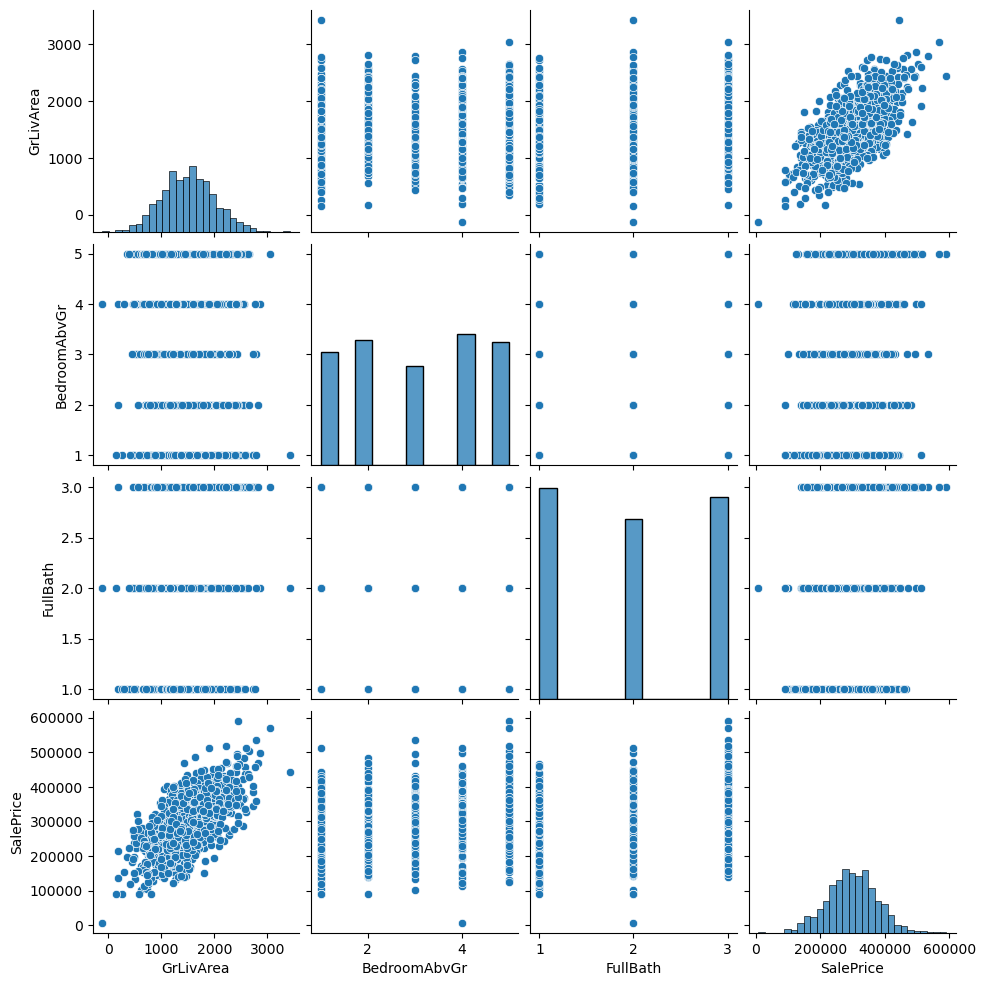

Mean Squared Error: 2331359778.33878
R-squared Score: 0.5639253962960423
               Coefficient
GrLivArea       104.419961
BedroomAbvGr  16569.240449
FullBath      20667.005284
Predicted Sale Price: $327,659.22


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the train dataset
# You need to download the 'train.csv' file from Kaggle first
# Option 1: Specify the correct path to where you saved the file
# data = pd.read_csv('/path/to/your/train.csv')

# Option 2: If you're using Google Colab, you can download directly:
# !kaggle competitions download -c house-prices-advanced-regression-techniques
# !unzip house-prices-advanced-regression-techniques.zip

# For this example, let's create some synthetic data instead
np.random.seed(42)
n_samples = 1000
grlivarea = np.random.normal(1500, 500, n_samples)
bedrooms = np.random.randint(1, 6, n_samples)
bathrooms = np.random.randint(1, 4, n_samples)
# Create price with some relationship to features
saleprice = 50000 + 100 * grlivarea + 15000 * bedrooms + 25000 * bathrooms + np.random.normal(0, 50000, n_samples)

data = pd.DataFrame({
    'GrLivArea': grlivarea,
    'BedroomAbvGr': bedrooms,
    'FullBath': bathrooms,
    'SalePrice': saleprice
})

# Continue with the rest of the code
df = data[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'SalePrice']]
df = df.dropna()  # remove rows with missing values
sns.pairplot(df)
plt.show()
X = df[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)
# Example: Predict price for a house with 1800 sq ft, 3 bedrooms, 2 full baths
sample = pd.DataFrame([[1800, 3, 2]], columns=['GrLivArea', 'BedroomAbvGr', 'FullBath'])
predicted_price = model.predict(sample)
print(f"Predicted Sale Price: ${predicted_price[0]:,.2f}")